# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

lat = []
lng = []
temp = []
humid = []
cloud = []
wind_speed = []
new_city = []
country = []


print("Begin Data Retrieval:")
print('-----------------------')

for city in cities: 
    response = requests.get(query_url + city).json()
    
    try: 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        new_city.append(city)
        
        print(f"Data for {city} found. Appending stats")
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except:
        print(f"No data found for {city}")



Begin Data Retrieval:
-----------------------
Data for mataura found. Appending stats
Data for beringovskiy found. Appending stats
Data for coquimbo found. Appending stats
Data for vestmannaeyjar found. Appending stats
No data found for sentyabrskiy
Data for cape town found. Appending stats
Data for constitucion found. Appending stats
Data for korla found. Appending stats
Data for erzin found. Appending stats
Data for semey found. Appending stats
Data for cidreira found. Appending stats
Data for port hedland found. Appending stats
Data for hobart found. Appending stats
Data for la ronge found. Appending stats
Data for severo-kurilsk found. Appending stats
Data for touros found. Appending stats
Data for wuwei found. Appending stats
Data for batemans bay found. Appending stats
Data for ribeira grande found. Appending stats
Data for hilo found. Appending stats
Data for altamira found. Appending stats
Data for torbay found. Appending stats
Data for lermontovka found. Appending stats
Data f

In [10]:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude

fahrenheit = [1.8*(i-273.15)+32 for i in temp]

weather_dict =  {
    "City": new_city,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp (F)": fahrenheit,
    "Humidity (%)": humid,
    "Cloudiness (%)": cloud,
    "Wind Speed (mph)": wind_speed
}

weather_data = pd.DataFrame(weather_dict)



### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [11]:
weather_data.to_csv('weather_data.csv', index = False, header = True)

In [12]:
weather_data.head()

,City,Country,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,mataura,NZ,-46.19,168.86,39.002,83,100,1.34
1,beringovskiy,RU,63.05,179.32,52.142,82,99,2.36
2,coquimbo,CL,-29.95,-71.34,50.000,93,48,2.10
3,vestmannaeyjar,IS,63.44,-20.27,50.000,76,40,11.30
4,cape town,ZA,-33.93,18.42,59.000,43,0,2.60


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
weather_humid = weather_data.loc[(weather_data['Humidity (%)']>100)]
weather_humid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              0 non-null      object 
 1   Country           0 non-null      object 
 2   Latitude          0 non-null      float64
 3   Longitude         0 non-null      float64
 4   Max Temp (F)      0 non-null      float64
 5   Humidity (%)      0 non-null      int64  
 6   Cloudiness (%)    0 non-null      int64  
 7   Wind Speed (mph)  0 non-null      float64
dtypes: float64(4), int64(2), object(2)
memory usage: 0.0+ bytes


In [14]:
#  Get the indices of cities that have humidity over 100%.
### None over 100% humidity

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [16]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

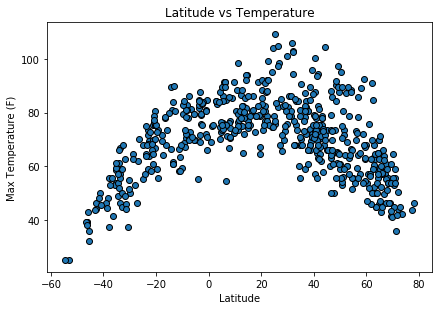

In [17]:
plt.scatter(weather_data['Latitude'], weather_data['Max Temp (F)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('../output_data/lat&temp.png')

This plot shows how the max temperature of cities changes based on their latitude. As you can see the temperarture tends to get higher as you approach the equator (0). As it's summer you'd expect the temperatures to perhaps be slightly higher in the northern hemisphere than the south.

## Latitude vs. Humidity Plot

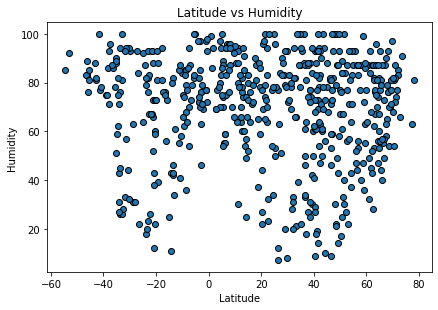

In [18]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/lat&humid.png')

This plot shows how the humidity of cities changes based on their latitude. Unsurprisingly this shows that cities tend to have a higher humidity closer to the equator.

## Latitude vs. Cloudiness Plot

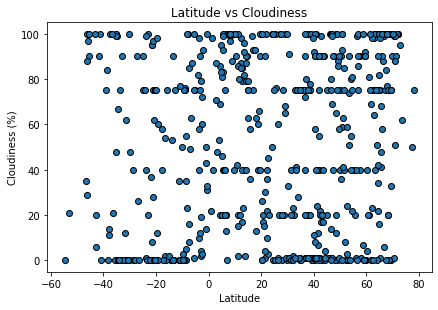

In [19]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('../output_data/lat&cloud.png')

This plot shows how the cloudiness of cities changes based on their latitude. Becuase of how cloudiness is calculated the spread is a bit less uniform, but it does suggest the cities tend to be cloudier between 0 and 20 degrees latitude.

## Latitude vs. Wind Speed Plot

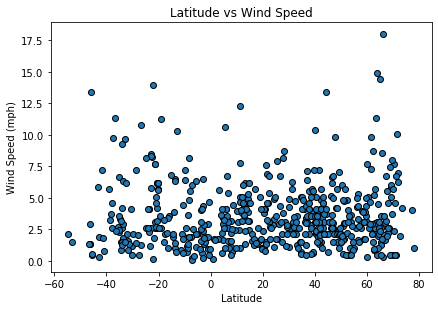

In [20]:
plt.scatter(weather_data['Latitude'], weather_data['Wind Speed (mph)'], edgecolor='black',)
plt.tight_layout()
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('../output_data/lat&wind.png')

This plot shows how the wind speed of cities changes based on their latitude. It seems countries that are far north tend to have a higher wind speed, but there may be a seasonal component to that as well.

## Linear Regression

In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

In [22]:
# Create Northern and Southern Hemisphere DataFrames
weather_north = weather_data.loc[(weather_data['Latitude']>0)]
weather_south = weather_data.loc[(weather_data['Latitude']<0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(20, 50, 'y=-0.43017768384693683x+88.95623608106766')

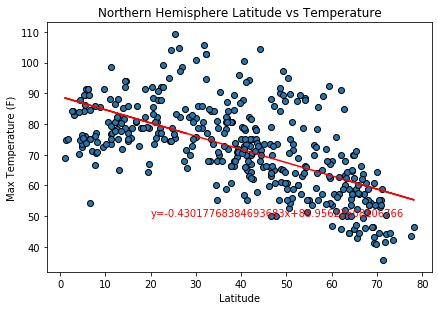

In [23]:
plt.scatter(weather_north['Latitude'], weather_north['Max Temp (F)'], edgecolor='black',)
plt.tight_layout()
plt.title('Northern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_north['Latitude'], weather_north['Max Temp (F)'])
regress_values = weather_north['Latitude']*slope + intercept
plt.plot(weather_north['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (20,50), color='red')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Text(-30, 50, 'y=0.8641969370505324x+83.16381892645586')

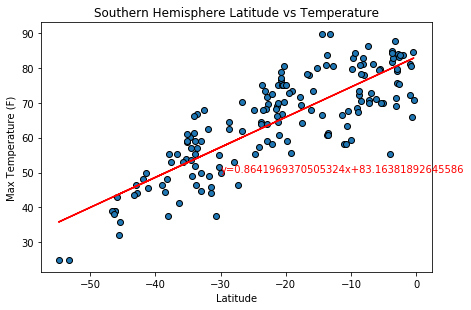

In [24]:
plt.scatter(weather_south['Latitude'], weather_south['Max Temp (F)'], edgecolor='black',)
plt.tight_layout()
plt.title('Southern Hemisphere Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
(slope1, intercept1, rvalue1, pvalue1, stderr1) = st.linregress(weather_south['Latitude'], weather_south['Max Temp (F)'])
regress_values1 = weather_south['Latitude']*slope1 + intercept1
plt.plot(weather_south['Latitude'], regress_values1, 'r-')
plt.annotate(f'y={slope1}x+{intercept1}', (-30,50), color='red')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(20, 50, 'y=-0.09582713988950997x+73.0531091756273')

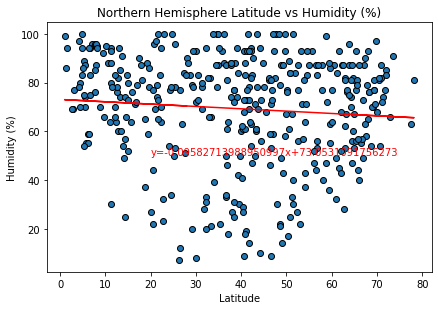

In [25]:
plt.scatter(weather_north['Latitude'], weather_north['Humidity (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Northern Hemisphere Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_north['Latitude'], weather_north['Humidity (%)'])
regress_values = weather_north['Latitude']*slope + intercept
plt.plot(weather_north['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (20,50), color='red')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Text(-40, 50, 'y=-0.013960425745323373x+69.57904826075305')

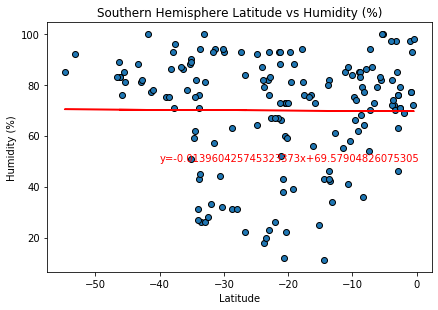

In [26]:
plt.scatter(weather_south['Latitude'], weather_south['Humidity (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Southern Hemisphere Latitude vs Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_south['Latitude'], weather_south['Humidity (%)'])
regress_values = weather_south['Latitude']*slope + intercept
plt.plot(weather_south['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (-40,50), color='red')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(20, 40, 'y=0.020566619412529755x+52.13166541896155')

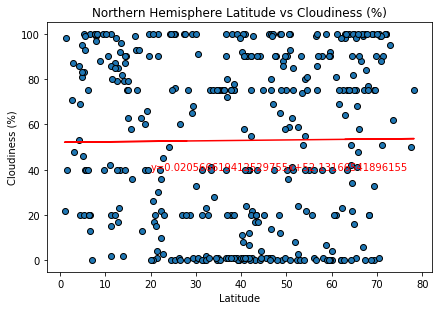

In [27]:
plt.scatter(weather_north['Latitude'], weather_north['Cloudiness (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Northern Hemisphere Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_north['Latitude'], weather_north['Cloudiness (%)'])
regress_values = weather_north['Latitude']*slope + intercept
plt.plot(weather_north['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (20,40), color='red')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Text(-20, 35, 'y=-0.0025336061466690726x+40.618848671978206')

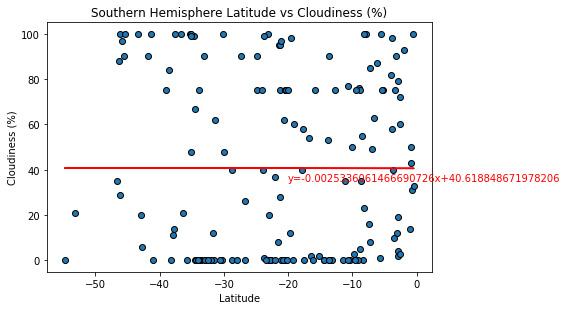

In [29]:
plt.scatter(weather_south['Latitude'], weather_south['Cloudiness (%)'], edgecolor='black',)
plt.tight_layout()
plt.title('Southern Hemisphere Latitude vs Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_south['Latitude'], weather_south['Cloudiness (%)'])
regress_values = weather_south['Latitude']*slope + intercept
plt.plot(weather_south['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (-20,35), color='red')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(20, 5, 'y=0.008497978237030282x+3.154714094768911')

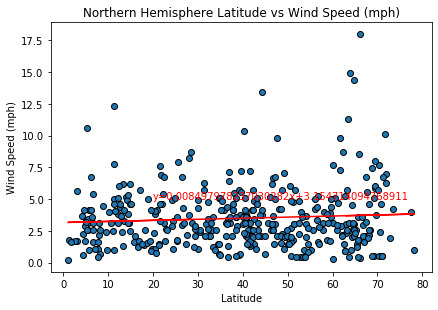

In [30]:
plt.scatter(weather_north['Latitude'], weather_north['Wind Speed (mph)'], edgecolor='black',)
plt.tight_layout()
plt.title('Northern Hemisphere Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_north['Latitude'], weather_north['Wind Speed (mph)'])
regress_values = weather_north['Latitude']*slope + intercept
plt.plot(weather_north['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (20,5), color='red')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Text(-20, 5, 'y=-0.021234471640530748x+3.046878746929381')

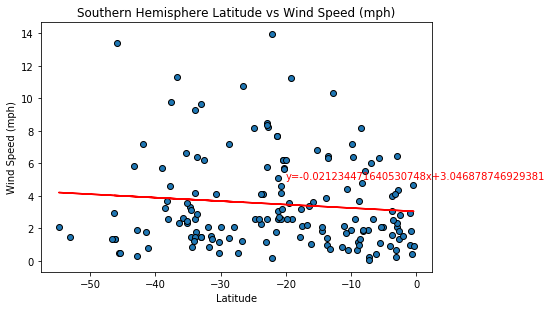

In [31]:
plt.scatter(weather_south['Latitude'], weather_south['Wind Speed (mph)'], edgecolor='black',)
plt.tight_layout()
plt.title('Southern Hemisphere Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weather_south['Latitude'], weather_south['Wind Speed (mph)'])
regress_values = weather_south['Latitude']*slope + intercept
plt.plot(weather_south['Latitude'], regress_values, 'r-')
plt.annotate(f'y={slope}x+{intercept}', (-20,5), color='red')

# Conclusions
